In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/Titanic/train.csv')

## ANALISIS DATA

In [ ]:
dataset.shape

(891, 12)

In [ ]:
dataset.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dataset.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
dataset.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## PREPROCESSING

In [ ]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [ ]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [ ]:
dataset = dataset.drop('Cabin', axis=1)

In [ ]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Eploratory Data Analysis (EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

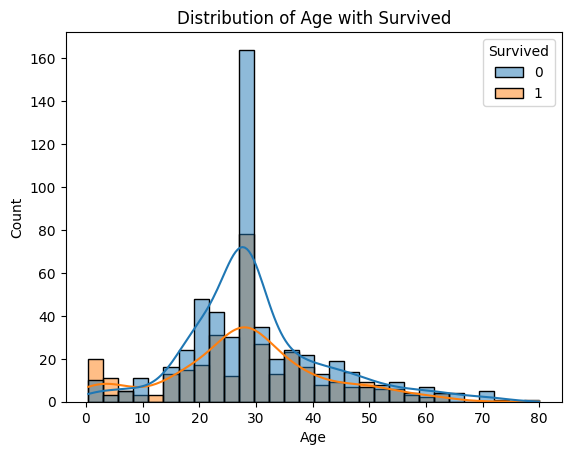

In [ ]:
sns.histplot(data=dataset, x='Age', hue='Survived', kde=True)
plt.title('Distribution of Age with Survived')
plt.show()

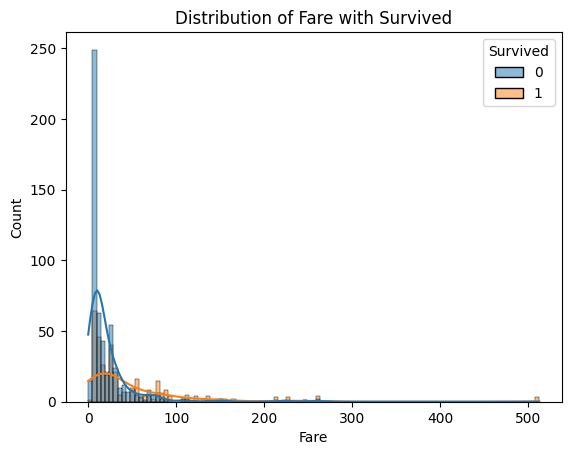

In [ ]:
sns.histplot(data=dataset, x='Fare', hue='Survived', kde=True)
plt.title('Distribution of Fare with Survived')
plt.show()

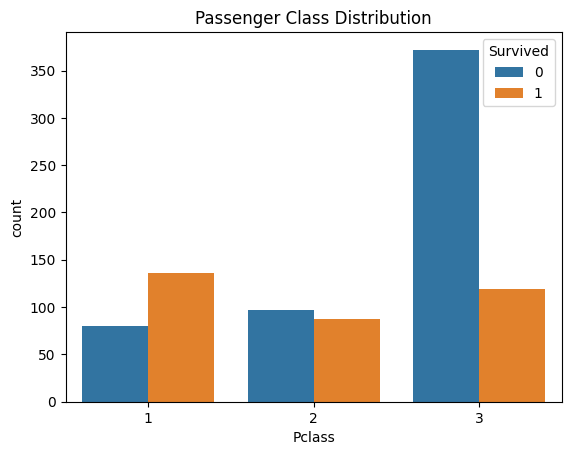

In [ ]:
sns.countplot(data=dataset, x='Pclass', hue='Survived')
plt.title('Passenger Class Distribution')
plt.show()

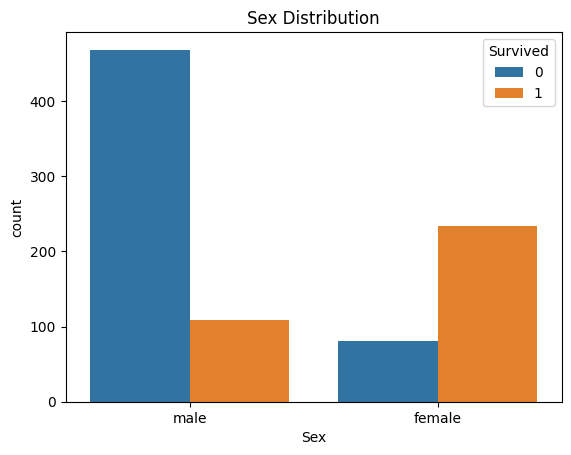

In [ ]:
sns.countplot(data=dataset, x='Sex', hue='Survived')
plt.title('Sex Distribution')
plt.show()

## CORRELATION MATRIX

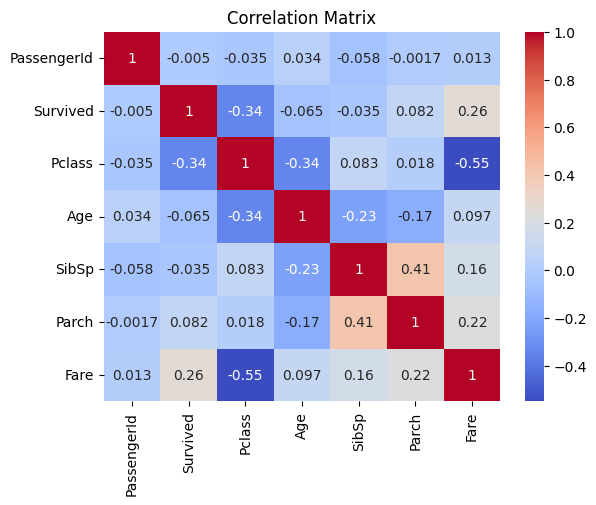

In [ ]:
corr_matrix = dataset.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## FEATURE ENGINEERING

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'])
dataset['Embarked'] = le.fit_transform(dataset['Embarked'])

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = dataset[features]
y = dataset['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
226,2,1,19.0,0,0,10.5000,2
278,3,1,7.0,4,1,29.1250,1
31,1,0,28.0,1,0,146.5208,0
449,1,1,52.0,0,0,30.5000,2
632,1,1,32.0,0,0,30.5000,0
...,...,...,...,...,...,...,...
418,2,1,30.0,0,0,13.0000,2
192,3,0,19.0,1,0,7.8542,2
399,2,0,28.0,0,0,12.6500,2
484,1,1,25.0,1,0,91.0792,0


In [ ]:
y_train

,Survived
226,1
278,0
31,1
449,1
632,1
...,...
418,0
192,1
399,1
484,1


In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
665,2,1,32.0,2,0,73.5000,2
336,1,1,29.0,1,0,66.6000,2
524,3,1,28.0,0,0,7.2292,0
635,2,0,28.0,0,0,13.0000,2
452,1,1,30.0,0,0,27.7500,0
...,...,...,...,...,...,...,...
621,1,1,42.0,1,0,52.5542,2
240,3,0,28.0,1,0,14.4542,0
27,1,1,19.0,3,2,263.0000,2
686,3,1,14.0,4,1,39.6875,2


In [ ]:
y_test

,Survived
665,0
336,0
524,0
635,1
452,0
...,...
621,1
240,0
27,0
686,0


MODELING MENGGUNAKAN RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=56)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=56)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
dataset_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
dataset_comparison

,Actual,Predicted
665,0,0
336,0,1
524,0,0
635,1,1
452,0,0
...,...,...
621,1,0
240,0,0
27,0,1
686,0,0


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[95 21]
 [18 45]]


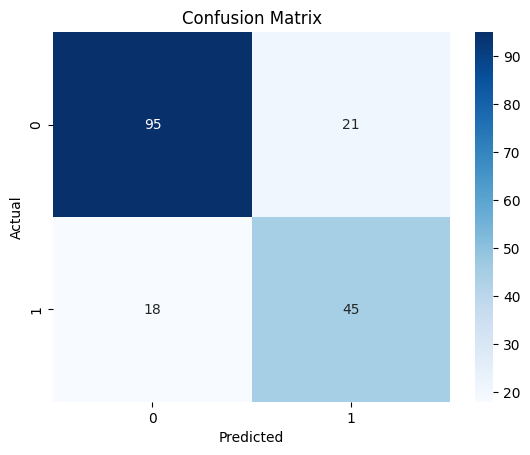

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


## MODELING MENGGUNAKAN K-NN

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[95 21]
 [18 45]]


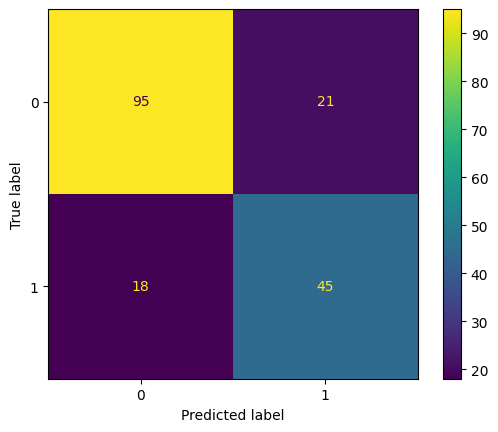

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() #default n_neighbors = 5
knn.fit(X_train, y_train)
knnPred = knn.predict(X_test)
knnProb = knn.predict_proba(X_test)
print(classification_report(y_test, knnPred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       116
           1       0.64      0.59      0.61        63

    accuracy                           0.74       179
   macro avg       0.71      0.70      0.71       179
weighted avg       0.73      0.74      0.73       179



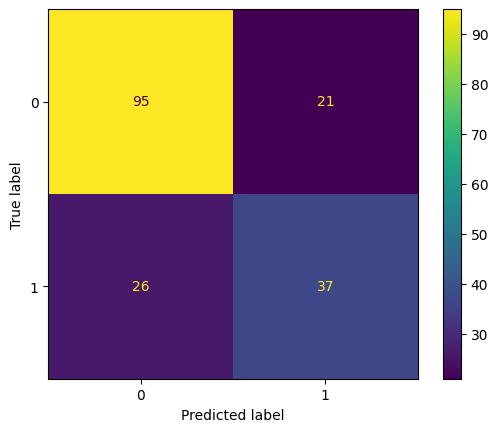

In [ ]:
cm = confusion_matrix(y_test, knnPred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, log_loss

print("Accuracy: ", accuracy_score(y_test, knnPred))
print("F1: ", f1_score(y_test, knnPred, average='weighted'))
print("Loss: ", log_loss(y_test, knnProb))

Accuracy:  0.7374301675977654
F1:  0.7347748950310168
Loss:  2.615287366316737


## MODELING GAUSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnbPred = gnb.predict(X_test)
gnbProb = gnb.predict_proba(X_test)
print(classification_report(y_test, gnbPred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       116
           1       0.74      0.71      0.73        63

    accuracy                           0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



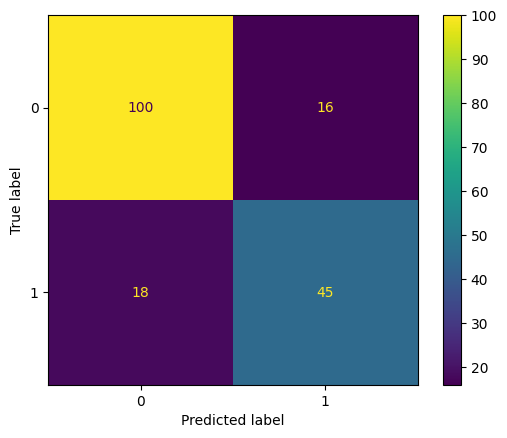

In [ ]:
cm = confusion_matrix(y_test, gnbPred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, log_loss

print("Accuracy: ", accuracy_score(y_test, gnbPred))
print("F1: ", f1_score(y_test, gnbPred, average='weighted'))
print("Loss: ", log_loss(y_test, gnbProb))

Accuracy:  0.8100558659217877
F1:  0.8093357854576091
Loss:  1.0079894884171525


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
hyper_params = {
'n_neighbors': range(1,16)
}
# Too many hyperparameters
# Range is too big
grid = GridSearchCV(KNeighborsClassifier(), hyper_params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 16)})

In [ ]:
grid.best_params_

{'n_neighbors': 1}

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'])
knn_model.fit(X_train, y_train)
knn2Pred = knn_model.predict(X_test)
knn2Prob = knn_model.predict_proba(X_test)
print(classification_report(y_test, knn2Pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       116
           1       0.52      0.54      0.53        63

    accuracy                           0.66       179
   macro avg       0.63      0.63      0.63       179
weighted avg       0.66      0.66      0.66       179

